b: 
Intercept    1.190238
x            0.444255
dtype: float64

x_sq_mean: 17.27675304867723

x_var: 953.7353266586754



/tmp/ipython-input-124200179.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x_range, b[0] + b[1] * x_range, color='grey',


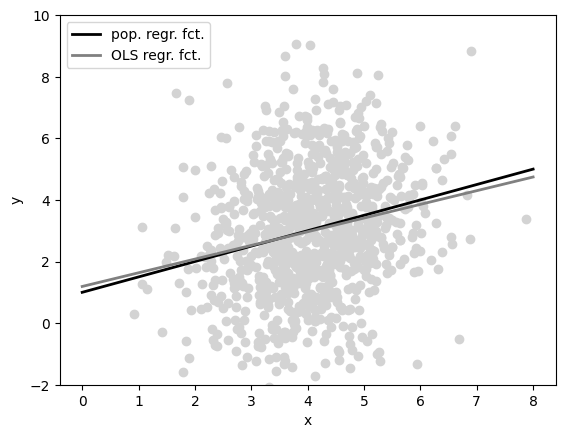

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
# set the random seed:
np.random.seed(1234567)
# set sample size:
n = 1000
# set true parameters (betas and sd of u):
beta0 = 1
beta1 = 0.5
su = 2
# draw a sample of size n:
x = stats.norm.rvs(4, 1, size=n)
u = stats.norm.rvs(0, su, size=n)
y = beta0 + beta1 * x + u
df = pd.DataFrame({'y': y, 'x': x})
# estimate parameters by OLS:
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')
# features of the sample for the variance formula:
x_sq_mean = np.mean(x ** 2)
print(f'x_sq_mean: {x_sq_mean}\n')
x_var = np.sum((x - np.mean(x)) ** 2)
print(f'x_var: {x_var}\n')
# graph:
x_range = np.linspace(0, 8, num=100)
plt.ylim([-2, 10])

plt.plot(x, y, color='lightgrey', marker='o', linestyle='')
plt.plot(x_range, beta0 + beta1 * x_range, color='black',
linestyle='-', linewidth=2, label='pop. regr. fct.')
plt.plot(x_range, b[0] + b[1] * x_range, color='grey',
linestyle='-', linewidth=2, label='OLS regr. fct.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.savefig('SLR-Sim-Sample.pdf')